In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [122]:
def bsmc(spot, m=2**16, vol = 0.2, T = 1, strike = 1.1):
    returns = np.random.normal(size=[m, 1])
    R = np.exp(-0.5*vol*vol*T \
                + vol*np.sqrt(T)*returns)
    S = spot * R 
    pay = np.maximum(0, S - strike)
    return np.mean(pay)

def bsPrice(spot, strike = 1.1, vol = 0.2, T = 1):
    d1 = (np.log(spot/strike) + 0.5 * vol * vol * T) / vol / np.sqrt(T)
    d2 = d1 - vol * np.sqrt(T)
    return spot * norm.cdf(d1) - strike * norm.cdf(d2)

In [123]:
spots = np.linspace(0.35, 1.65, 100)

mc, form = [], []
for spot in spots:
    mc.append(bsmc(spot))
    form.append(bsPrice(spot))

In [124]:
form = np.array(form); mc = np.array(mc)
errors = (form-mc) * 100
rmse = np.mean(errors**2)

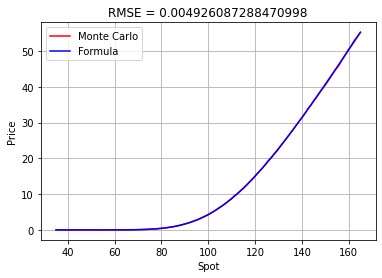

In [125]:
plt.plot(100*spots, 100*mc, 'r', label = 'Monte Carlo')
plt.plot(100*spots, 100*form, 'b', label = 'Formula')
plt.xlabel('Spot')
plt.ylabel('Price')
plt.title('RMSE = {}'.format(rmse))
plt.legend()
plt.grid(True)

In [ ]:
Noget med mimic af Heston kurve blablabla